# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [47]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [48]:
df = pd.read_csv(
    "craftcans.csv",
    na_values=['Does not apply', 'NaN']
    )
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


In [49]:
df.shape

(2416, 7)

## How many rows do you have in the data? What are the column types?

In [50]:
# There are 2416 rows of data
df.info

<bound method DataFrame.info of                                                    Beer  \
0                                          Get Together   
1                                         Maggie's Leap   
2                                            Wall's End   
3                                               Pumpion   
4                                            Stronghold   
5                                           Parapet ESB   
6                                        Citra Ass Down   
7                                        London Balling   
8                                                  35 K   
9                                                A Beer   
10                                      Rules are Rules   
11                                        Flesh Gourd'n   
12                                             Sho'nuff   
13                                          Bloody Show   
14                                          Rico Sauvin   
15                      

In [51]:
# The column types are Beer, Brewery, Location, Style, Size, ABV and IBUs
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [52]:
# The top 10 producers of beer in terms of different cans of beer are Brewery Vivant, Oskar Blues Brewery, Sun King Brewing Company, Cigar City Brewing Company, Sixpoint Craft Ales, Hopworks Urban Brewery, Stevens Point Brewery, Great Crescent Brewery, 21st Amendment Brewery and Bonfire Brewing Company.
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [53]:
# The most common ABV (alcohol by volume) percentage is 5.00% from this beer data set.
df['ABV'].value_counts()

ABV
5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.80%      66
5.60%      66
5.10%      62
5.30%      60
4.90%      59
6.20%      59
8.00%      57
4.70%      57
6.80%      52
5.70%      52
5.40%      50
7.50%      43
4.00%      38
6.30%      38
4.20%      38
7.20%      37
9.90%      35
5.90%      34
4.60%      32
6.90%      32
8.50%      26
6.70%      25
9.00%      24
8.20%      22
6.40%      21
6.10%      21
6.60%      20
7.10%      18
7.30%      18
4.40%      16
3.90%      15
7.70%      13
9.20%      13
4.30%      12
8.70%      10
7.80%      10
4.10%       9
9.50%       9
7.40%       8
8.30%       8
7.90%       7
3.80%       6
8.80%       6
3.50%       6
9.30%       5
9.70%       5
7.60%       5
9.60%       5
8.10%       4
3.70%       4
8.60%       4
3.20%       3
9.10%       3
8.40%       3
9.80%       3
8.90%       2
2.70%       2
9.40%       1
3.40%       1
10.00%      1
2.80%       1
12.50%      1
10.40%      1
12

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [54]:
df['ABV'].head(2415)

0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
30       4.70%
31       5.60%
32       4.60%
33       6.30%
34       9.30%
35       6.20%
36       6.00%
37       4.80%
38       7.70%
39       9.70%
40       5.00%
41       8.70%
42       6.10%
43       7.10%
44       8.30%
45       5.00%
46       9.50%
47       7.30%
48       7.10%
49       6.50%
50       8.00%
51       5.20%
52       6.70%
53       6.00%
54       4.10%
55       4.80%
56       5.50%
57       4.80%
58       5.80%
59       6.50%
60       5.00%
61       5.00%
62       5.80%
63       4.50%
64       8.50%
65       6.50%
66       5

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [55]:
df['ABV'] = df['ABV'].str.replace("%","")

In [56]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25.0


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [57]:
df['ABV'] = df['ABV'].str.replace("%","").astype(float)

In [58]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

In [59]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [60]:
df.agg({
    'ABV': ['median','mean','std']
})

,ABV
median,5.600000
mean,5.977342
std,1.354173


<Axes: >

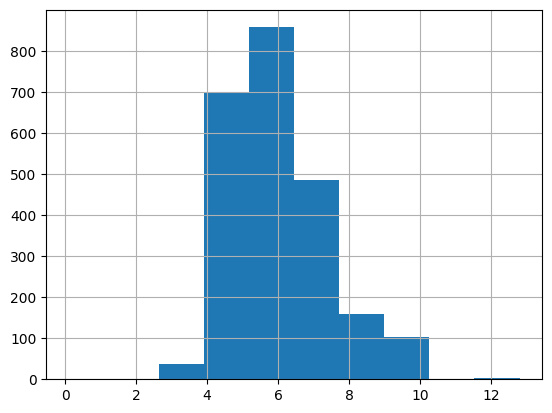

In [61]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [62]:
# There are 68 rows where ABV = NaN
df[df['ABV'].isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
217,U. P. Witbier,Keweenaw Brewing Company,"Houghton, MI",Witbier,12 oz.,NaN,NaN
307,Fat Paczki,Brewery Vivant,"Grand Rapids, MI",Belgian Dark Ale,16 oz.,NaN,NaN
308,Earth-Like Planets,Brewery Vivant,"Grand Rapids, MI",Belgian Pale Ale,16 oz.,NaN,NaN
324,Royal Lager,Weston Brewing Company,"Weston, MO",American Pale Lager,16 oz.,NaN,NaN
344,O’Malley’s Stout,Weston Brewing Company,"Weston, MO",English Stout,12 oz.,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [63]:
df['Location'].value_counts().head(10)
# The top 10 cities in the US for canned craft beer are Grand Rapids, Chicago, Portland, Indianapolis, San Diego, Boulder, Denver, Brookyln, Seattle, and Longmont

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [64]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [65]:
# Sixpoint Craft Ales has 42 different cans of beer in their lineup which is the most in Brooklyn by a long shot.
df[df['Location'] == 'Brooklyn, NY'].groupby('Brewery').size().sort_values(ascending=False)


Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [66]:
# There is some duplicates, but six of the most common styles of beer produced by Sixpoint are American IPA, American Double/Imperial IPA, Baltic Porter, Cream Ale, Rye Beer and German Pilsner
df[df['Brewery'] == 'Sixpoint Craft Ales'].groupby('Style').size().sort_values(ascending=False)

Style
American IPA                      4
American Double / Imperial IPA    2
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Rye Beer                          2
American Brown Ale                1
American Pale Ale (APA)           1
American Pale Wheat Ale           1
American Stout                    1
American Strong Ale               1
Belgian Pale Ale                  1
Fruit / Vegetable Beer            1
Gose                              1
Pumpkin Ale                       1
Saison / Farmhouse Ale            1
dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [67]:
df[df['Location'].str.contains("NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [68]:
# There are 74 breweries in New York state.
df['Location'].str.contains("NY", na=False).value_counts()

Location
False    2342
True       74
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [69]:
df[df['Style'].str.contains("IPA", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,NaN


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [70]:
df['IBUs'].mean()

np.float64(42.71316725978647)

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [71]:
# The average is 42.7 or 43 rounded up
df['IBUs'].mean()

np.float64(42.71316725978647)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

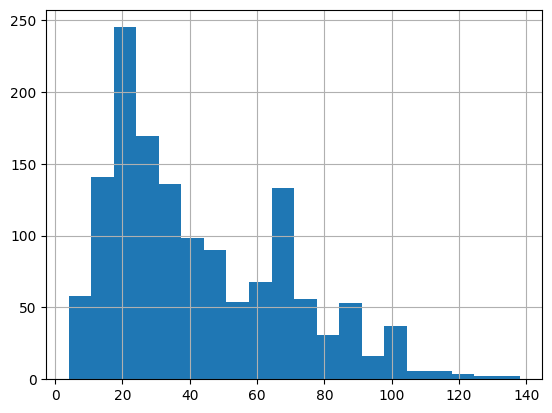

In [72]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [73]:
# There are 64 beers with an IBU above the 75th percentile
df['IBUs'].describe(percentiles=[0.75])

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [74]:
df[df['IBUs'] >= df['IBUs'].quantile(0.75)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [75]:
df[df['IBUs'] < df['IBUs'].quantile(0.25)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [76]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=False)

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
English Strong Ale                     52.0
Baltic Porter                          52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

<Axes: title={'center': 'IBUs across Beer styles'}, ylabel='Style'>

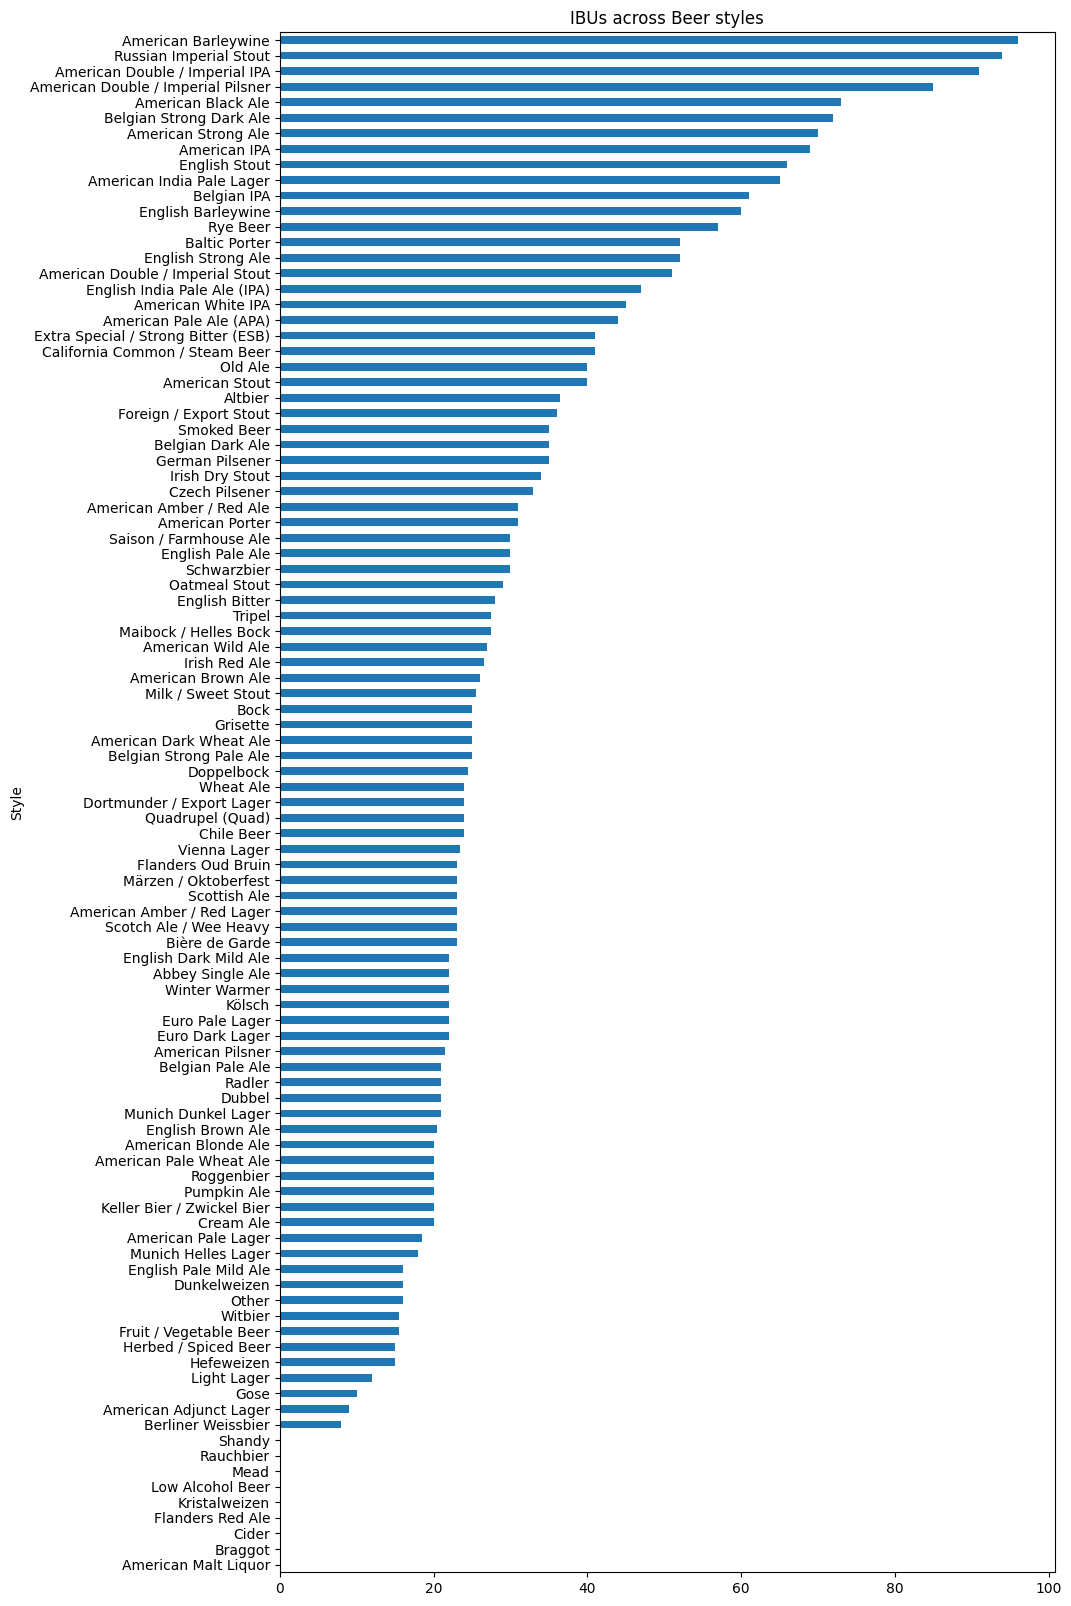

In [77]:
df.groupby('Style')['IBUs'].median().sort_values(ascending=True, na_position='first').plot(kind='barh',figsize=(10, 20), title='IBUs across Beer styles')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [78]:
df[df['IBUs'] < df['IBUs'].quantile(0.25)].groupby('Style').size().sort_values(ascending=False)
# The top 5 common styles of low-IBU beer are American Pale Wheat Ale, American Blonde Ale, Fruit/Vegetable Beer, Hefeweizen and Witbier

Style
American Pale Wheat Ale       43
American Blonde Ale           36
Fruit / Vegetable Beer        28
Hefeweizen                    21
Witbier                       20
American Amber / Red Ale      15
Kölsch                        11
American Adjunct Lager        11
Munich Helles Lager           11
Cream Ale                     10
American Pale Lager            9
American Brown Ale             8
Saison / Farmhouse Ale         7
American Amber / Red Lager     7
Gose                           7
American Pilsner               6
Pumpkin Ale                    6
American Porter                6
Märzen / Oktoberfest           5
English Brown Ale              5
Berliner Weissbier             5
Scotch Ale / Wee Heavy         4
Oatmeal Stout                  4
Vienna Lager                   4
Scottish Ale                   3
Light Lager                    3
Herbed / Spiced Beer           3
Winter Warmer                  3
German Pilsener                3
Belgian Pale Ale               3
Amer

In [79]:
df[df['IBUs'] > df['IBUs'].quantile(0.75)].groupby('Style').size().sort_values(ascending=False)
# The top 5 most common high-IBU beers are American IPA, American Double/Imperial IPA, American Pale Ale, and American Strong Ale

Style
American IPA                           195
American Double / Imperial IPA          72
American Pale Ale (APA)                 18
American Black Ale                      15
American Strong Ale                      9
American Amber / Red Ale                 7
Russian Imperial Stout                   7
Rye Beer                                 3
American India Pale Lager                2
American Barleywine                      2
English India Pale Ale (IPA)             2
American Stout                           2
American Double / Imperial Stout         1
American Pale Lager                      1
American Porter                          1
American Double / Imperial Pilsner       1
American White IPA                       1
Baltic Porter                            1
Belgian IPA                              1
Belgian Strong Dark Ale                  1
English Barleywine                       1
English Stout                            1
Extra Special / Strong Bitter (ESB)      1
Ameri

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [80]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'AmericanPaleWheatAle'])]['IBUs'].mean()
# The mean IBU for these styles is 16.9 or 17

np.float64(16.941176470588236)

## Draw a histogram of the IBUs of those beers

<Axes: >

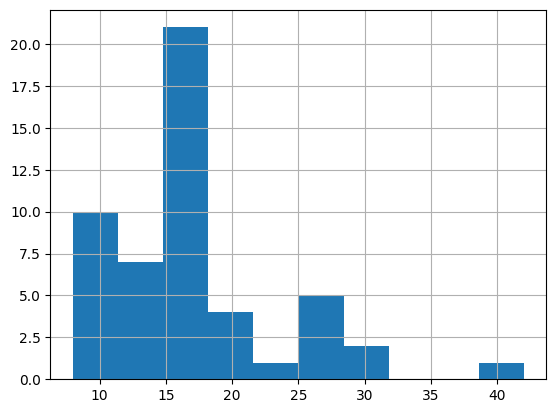

In [81]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'AmericanPaleWheatAle'])]['IBUs'].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [82]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].mean()
# The mean of IBUs with the style IPA is 71.95


np.float64(71.94897959183673)

<Axes: >

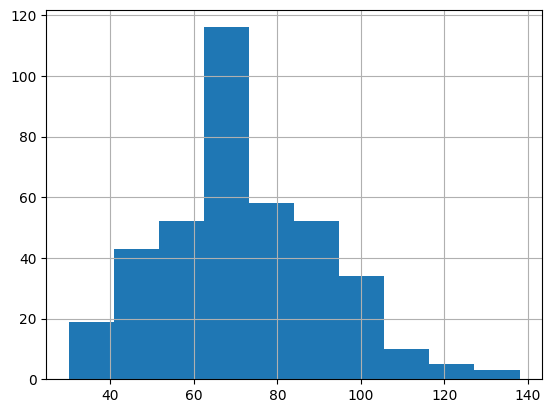

In [83]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

TypeError: unsupported operand type(s) for &: 'Axes' and 'Axes'

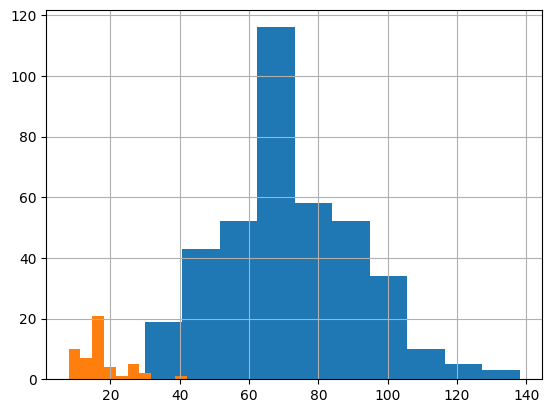

In [84]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].hist() & df[df['Style'].isin(['Witbier', 'Hefeweizen', 'AmericanPaleWheatAle'])]['IBUs'].hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<Axes: >

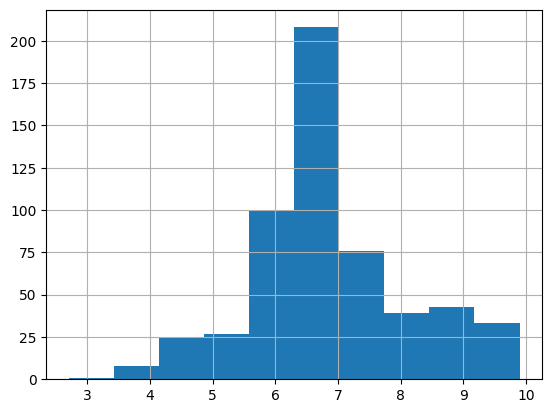

In [85]:
df[df['Style'].str.contains("IPA", na=False)]['ABV'].hist()

<Axes: >

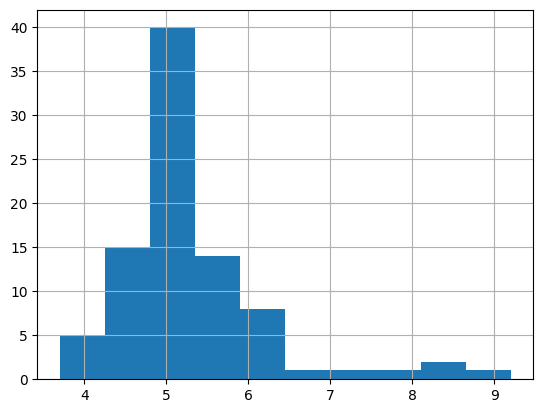

In [86]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'AmericanPaleWheatAle'])]['ABV'].hist()

TypeError: unsupported operand type(s) for &: 'Axes' and 'Axes'

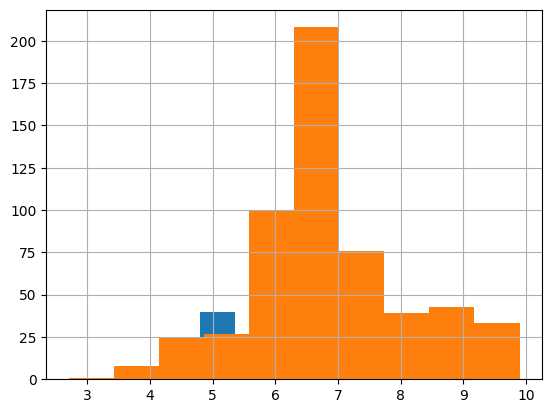

In [87]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'AmericanPaleWheatAle'])]['ABV'].hist() & df[df['Style'].str.contains("IPA", na=False)]['ABV'].hist()

## Good work!